### load the data

In [1]:
import pandas as pd

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
print(f'train dataset has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'test dataset has {test.shape[0]} rows and {test.shape[1]} columns')

train dataset has 7613 rows and 5 columns
test dataset has 3263 rows and 4 columns


In [5]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [30]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


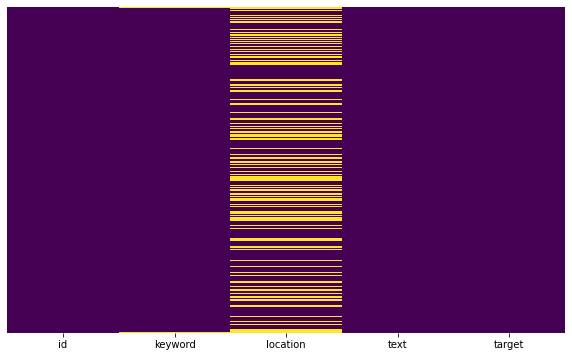

In [37]:
sns.heatmap(train.isnull(), annot=False,yticklabels=[], cbar=False, cmap='viridis')
fig = plt.gcf()
fig.set_size_inches(10,6) # we have some missing values in the keyword and location columns

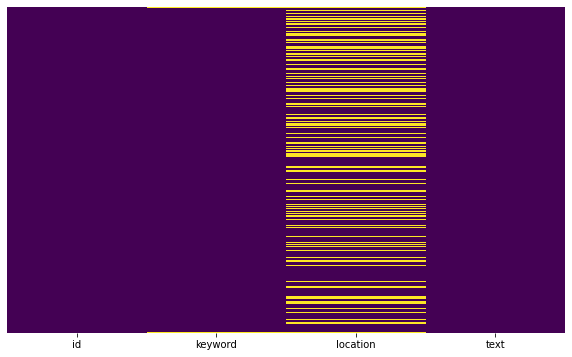

In [40]:
sns.heatmap(test.isnull(), annot=False,yticklabels=[], cbar=False, cmap='viridis')
fig = plt.gcf()
fig.set_size_inches(10,6); #same with the test dataset

### EDA

In [24]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 KB 2.2 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

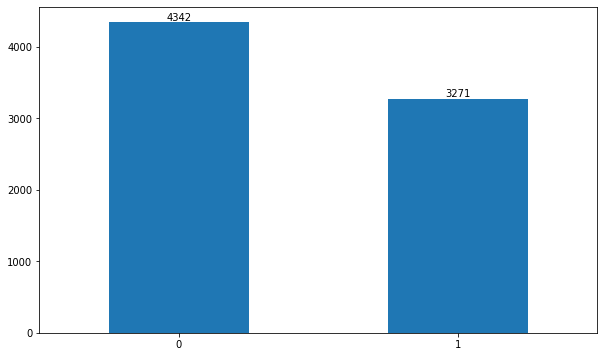

In [22]:
train['target'].value_counts().plot.bar(figsize=(10,6))
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=360);

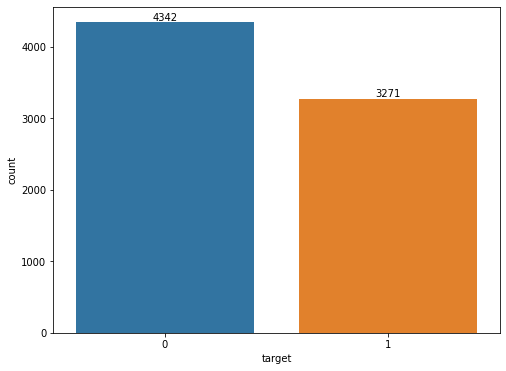

In [29]:
sns.countplot(x='target', data=train)
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(8,6)

### 

In [42]:
train['text_length']=train['text'].apply(len)

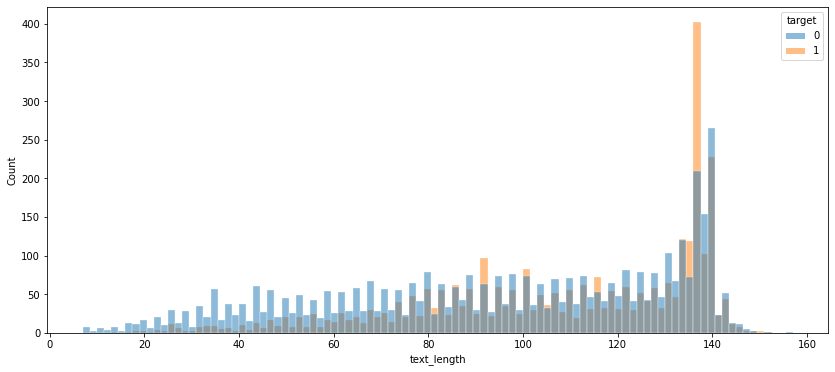

In [87]:
sns.histplot(x='text_length',data=train, hue='target', bins=100,edgecolor='white')
fig = plt.gcf()
fig.set_size_inches(14,6) # the distributions of letter length look really similar among those two groups

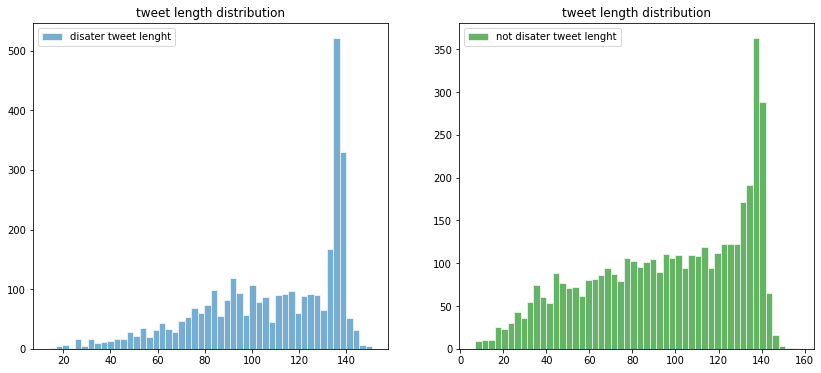

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].hist(train[train['target']==1]['text_length'], bins=50, edgecolor='w', label='disater tweet lenght', alpha=0.6)
axes[0].legend()
axes[0].set_title('tweet length distribution')
axes[1].hist(train[train['target']==0]['text_length'], bins=50, edgecolor='w', color='g', label='not disater tweet lenght', alpha=0.6)
axes[1].legend()
axes[1].set_title('tweet length distribution'); # how they look when ploted separately

In [97]:
train['word_length'] = train['text'].apply(lambda x: x.split()).apply(len)

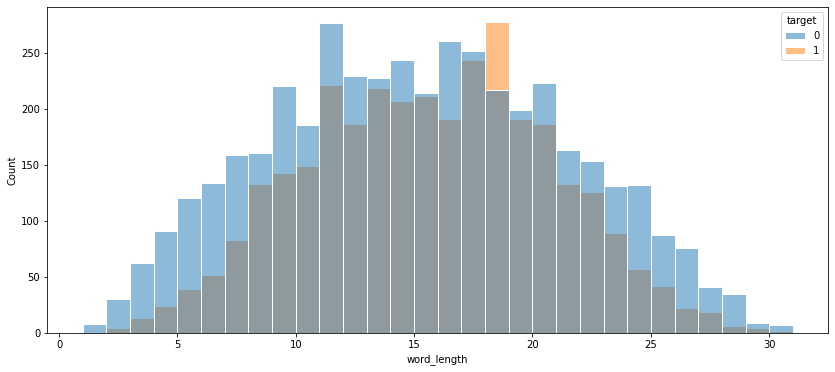

In [104]:
sns.histplot(x='word_length',data=train, hue='target', bins=30,edgecolor='white')
fig = plt.gcf()
fig.set_size_inches(14,6);

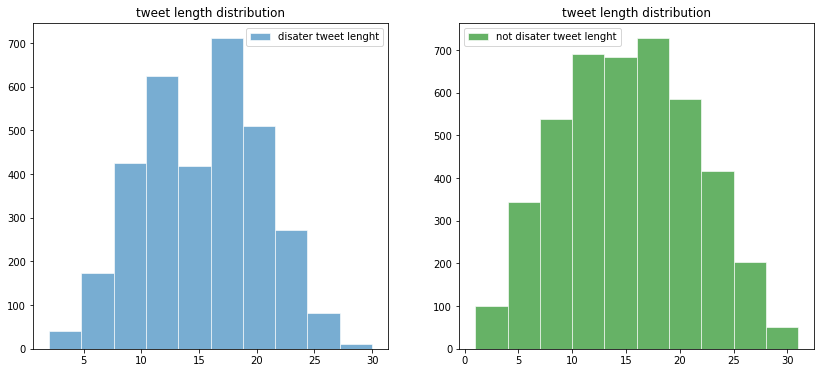

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].hist(train[train['target']==1]['word_length'], edgecolor='w', label='disater tweet lenght', alpha=0.6)
axes[0].legend()
axes[0].set_title('tweet length distribution')
axes[1].hist(train[train['target']==0]['word_length'], edgecolor='w', color='g', label='not disater tweet lenght', alpha=0.6)
axes[1].legend()
axes[1].set_title('tweet length distribution'); # still quite similar

In [125]:
import numpy as np

In [128]:
train['avg_word_length'] = train['text'].apply(lambda x: x.split()).apply(lambda a: [len(i) for i in a]).apply(lambda j: np.mean(j))

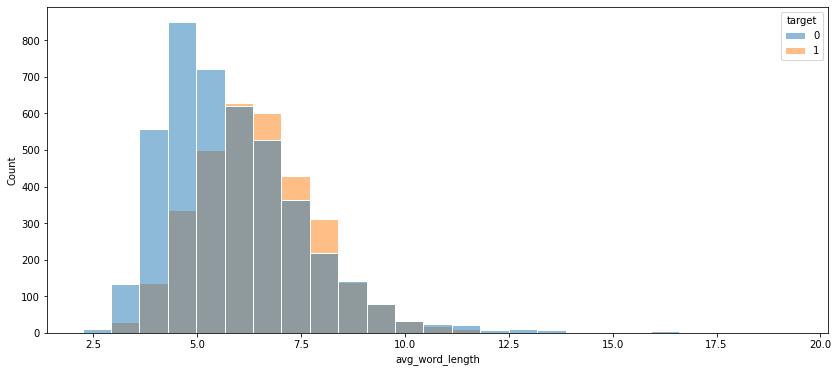

In [136]:
sns.histplot(x='avg_word_length',data=train, hue='target', bins=25,edgecolor='white')
fig = plt.gcf()
fig.set_size_inches(14,6);

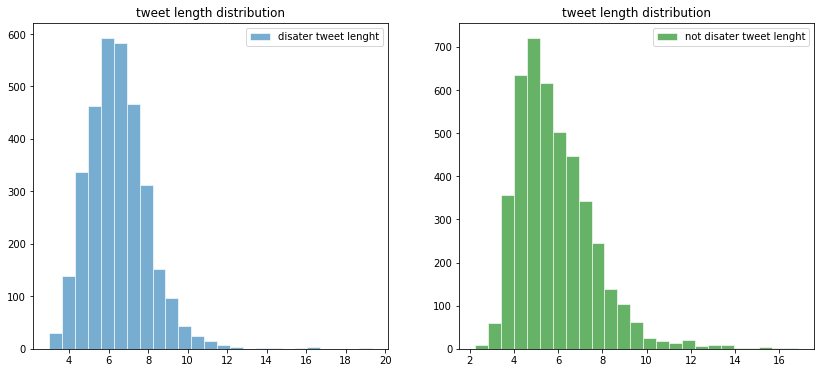

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].hist(train[train['target']==1]['avg_word_length'],bins=25, edgecolor='w', label='disater tweet lenght', alpha=0.6)
axes[0].legend()
axes[0].set_title('tweet length distribution')
axes[1].hist(train[train['target']==0]['avg_word_length'],bins=25,edgecolor='w', color='g', label='not disater tweet lenght', alpha=0.6)
axes[1].legend()
axes[1].set_title('tweet length distribution'); # again really similar

### stopwords in train dataset

In [161]:
def create_corpus(data, target):
    corpus = []
    for i in data[data['target']==target]['text'].apply(lambda x: x.split()):
        for x in i:
            corpus.append(x)
    return corpus

In [585]:
corpus_non_disaster = create_corpus(train, 0)
print(corpus_non_disaster)

["What's", 'up', 'man?', 'I', 'love', 'fruits', 'Summer', 'is', 'lovely', 'My', 'car', 'is', 'so', 'fast', 'What', 'a', 'goooooooaaaaaal!!!!!!', 'this', 'is', 'ridiculous....', 'London', 'is', 'cool', ';)', 'Love', 'skiing', 'What', 'a', 'wonderful', 'day!', 'LOOOOOOL', 'No', 'way...I', "can't", 'eat', 'that', 'shit', 'Was', 'in', 'NYC', 'last', 'week!', 'Love', 'my', 'girlfriend', 'Cooool', ':)', 'Do', 'you', 'like', 'pasta?', 'The', 'end!', 'We', 'always', 'try', 'to', 'bring', 'the', 'heavy.', '#metal', '#RT', 'http://t.co/YAo1e0xngw', 'Crying', 'out', 'for', 'more!', 'Set', 'me', 'ablaze', 'On', 'plus', 'side', 'LOOK', 'AT', 'THE', 'SKY', 'LAST', 'NIGHT', 'IT', 'WAS', 'ABLAZE', 'http://t.co/qqsmshaJ3N', '@PhDSquares', '#mufc', "they've", 'built', 'so', 'much', 'hype', 'around', 'new', 'acquisitions', 'but', 'I', 'doubt', 'they', 'will', 'set', 'the', 'EPL', 'ablaze', 'this', 'season.', 'Ablaze', 'for', 'you', 'Lord', ':D', 'Check', 'these', 'out:', 'http://t.co/rOI2NSmEJJ', 'http:/

In [167]:
from nltk.corpus import stopwords

In [280]:
print([word for word in corpus if word in stopwords.words('english')]) #all the stopwords in the corpus

['up', 'is', 'is', 'so', 'a', 'this', 'is', 'is', 'a', 'that', 'in', 'my', 'you', 'to', 'the', 'out', 'for', 'me', 'so', 'but', 'they', 'will', 'the', 'this', 'for', 'you', 'these', 'on', 'the', "you're", 'and', 'but', "you're", 'an', 'the', 'the', 'and', 'to', 'for', 'of', 'to', 'with', 'my', 'not', 'my', 'in', 'the', 'your', 'and', 'with', 'the', 'to', 'the', 'these', 'with', 'to', 'have', 'to', 'them', 'for', 'the', 'at', 'of', 'the', 'has', 'to', 'my', 'and', 'our', 'and', 'was', 'a', 'was', 'a', 'the', 'was', 'in', 'and', 'to', 'be', 'with', 'if', 'my', 'in', 'yours', 'by', 'of', 'to', 'about', 'a', 'have', 'their', 'in', 'what', 'does', 'your', "don't", 'if', 'can', 'it', 'to', 'have', 'in', 'a', 'my', "it's", 'for', 'me', 'to', 'have', 'a', 'this', 'our', 'how', 'a', 'can', 'of', 'your', 'of', 'a', 'they', 'what', 'was', "didn't", 'as', 'as', 'we', 'is', 'was', 'an', 'and', 'some', 'all', 'over', 'to', 'how', 'is', 'when', 'him', 'was', 'in', 'it', 'was', 'an', 'an', 'your', 'wi

In [173]:
from collections import defaultdict

In [597]:
dic_non_disaster = defaultdict(int)
for word in corpus_non_disaster:
    if word in stopwords.words('english'):
        dic_non_disaster[word] += 1

In [643]:
top_10 = sorted(dic_non_disaster.items(), key=lambda x:x[1], reverse=True)[:10]

In [644]:
top_10.reverse()

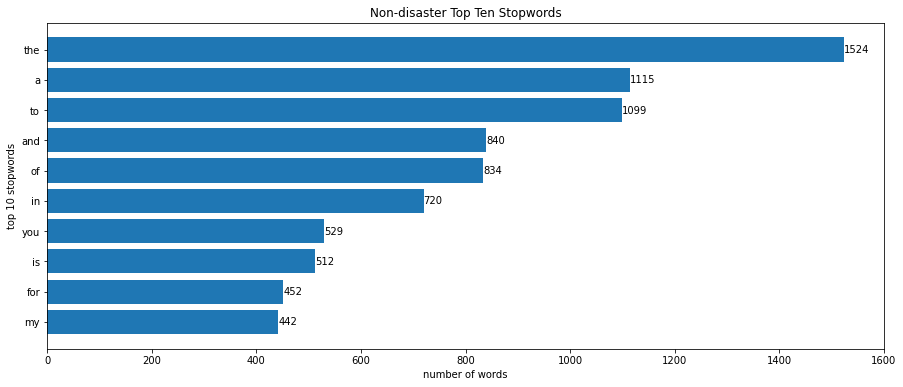

In [646]:
x,y = zip(*top_10)
plt.barh(x,y)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.xlabel('number of words')
plt.ylabel('top 10 stopwords')
plt.title('Non-disaster Top Ten Stopwords'); # the top ten stopwords in non-disaster corpus

In [591]:
corpus_disaster = create_corpus(train, 1)

In [601]:
dic_disaster = defaultdict(int)
for word in corpus_disaster:
    if word in stopwords.words('english'):
        dic_disaster[word] += 1

In [613]:
top_10 = sorted(dic_disaster.items(), key=lambda x:x[1], reverse=True)[:10]

In [614]:
top_10.reverse()

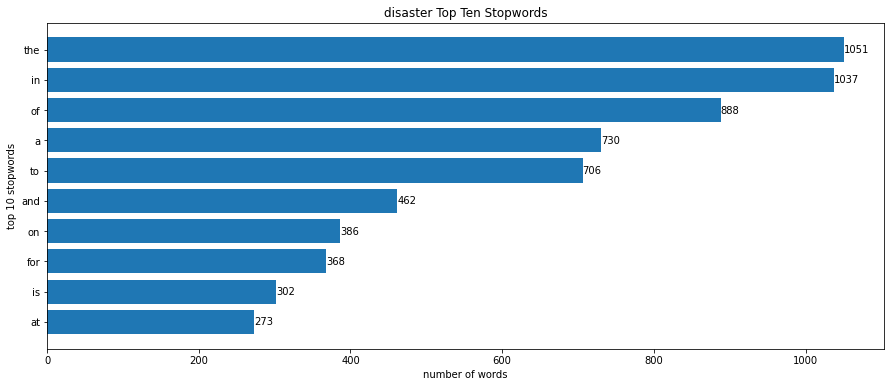

In [616]:
x,y = zip(*top_10)
plt.barh(x,y)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.xlabel('number of words')
plt.ylabel('top 10 stopwords')
plt.title('disaster Top Ten Stopwords');

###  punctuations in the train dataset

In [647]:
import string

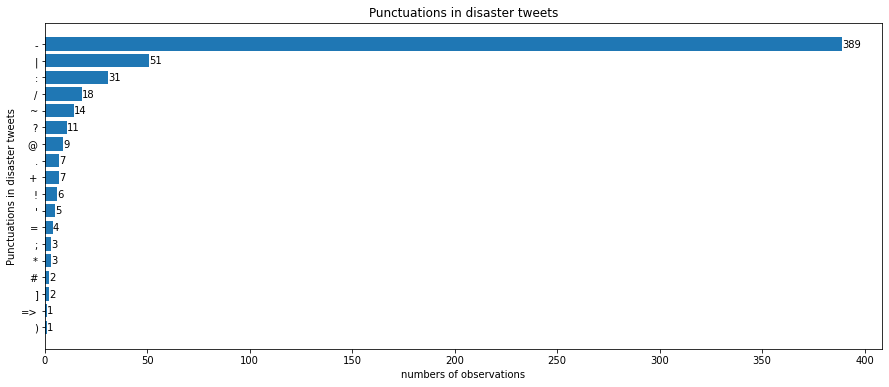

In [653]:
dic_disaster_punc=defaultdict(int)
for word in corpus_disaster:
    if word in string.punctuation:
        dic_disaster_punc[word] += 1
        
punc = sorted(dic_disaster_punc.items(), key=lambda x:x[1], reverse=True)
punc.reverse()

x,y = zip(*punc)
plt.barh(x,y)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.xlabel('numbers of observations')
plt.ylabel('Punctuations in disaster tweets')
plt.title('Punctuations in disaster tweets');

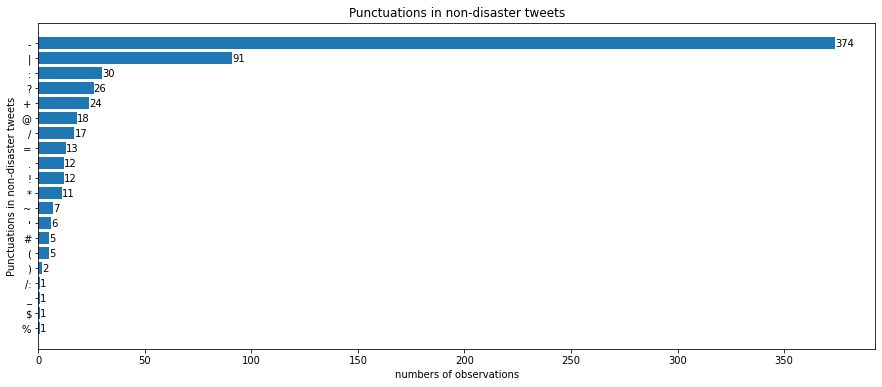

In [652]:
dic_non_disaster_punc=defaultdict(int)
for word in corpus_non_disaster:
    if word in string.punctuation:
        dic_non_disaster_punc[word] += 1
        
punc = sorted(dic_non_disaster_punc.items(), key=lambda x:x[1], reverse=True)
punc.reverse()

x,y = zip(*punc)
plt.barh(x,y)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.xlabel('numbers of observations')
plt.ylabel('Punctuations in non-disaster tweets')
plt.title('Punctuations in non-disaster tweets');

### common words in train data set

In [707]:
from collections import Counter

In [708]:
count=Counter(corpus_disaster)
most_common = count.most_common()

In [709]:
x = []
y = []
for word, count in most_common[:40][::-1]:
    if word not in stopwords.words('english'):
        if word not in string.punctuation:
            x.append(word)
            y.append(count)

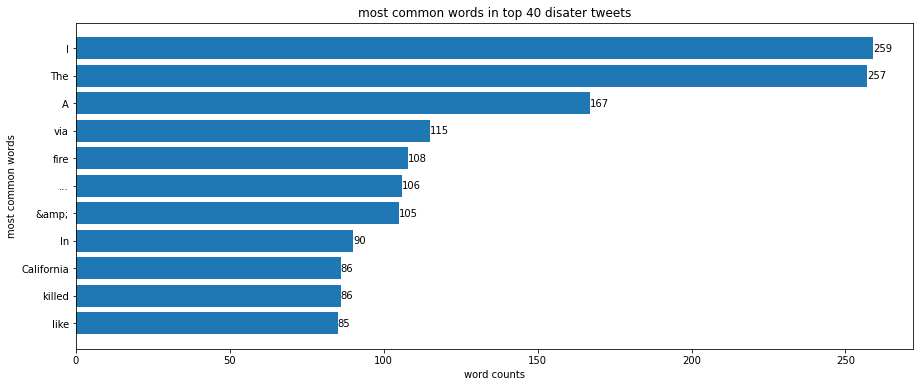

In [710]:
plt.barh(x,y)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.xlabel('word counts')
plt.ylabel('most common words')
plt.title('most common words in top 40 disater tweets');

In [711]:
count=Counter(corpus_non_disaster)
most_common = count.most_common()

In [712]:
x = []
y = []
for word, count in most_common[:40][::-1]:
    if word not in stopwords.words('english'):
        if word not in string.punctuation:
            x.append(word)
            y.append(count)

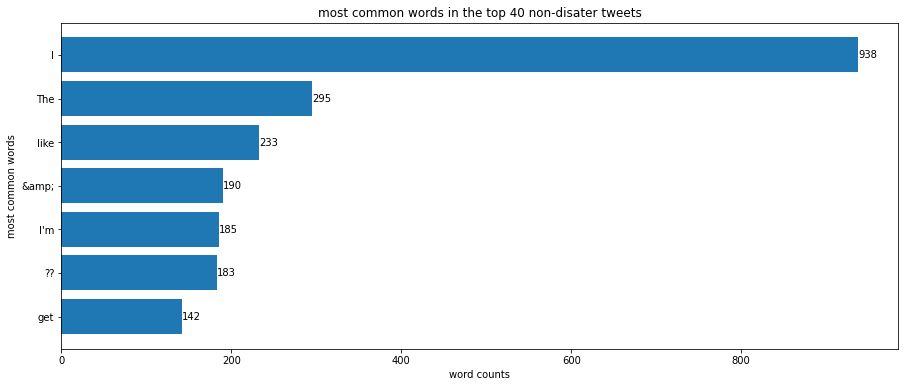

In [714]:
plt.barh(x,y)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.xlabel('word counts')
plt.ylabel('most common words')
plt.title('most common words in the top 40 non-disater tweets');

### check most common bigrams in tweets

In [722]:
from sklearn.feature_extraction.text import CountVectorizer

In [743]:
vectorizer = CountVectorizer(ngram_range=(2,2))
bow = vectorizer.fit_transform(corpus_disaster)

In [744]:
print(bow.shape)
print(bow.sum(axis=0).shape)

(49613, 3209)
(1, 3209)


In [767]:
bigrams_count = [(word, bow.sum(axis=0)[0,idx]) for word, idx in vectorizer.vocabulary_.items()]

In [768]:
bigrams_count_sorted = sorted(bigrams_count, key=lambda x:x[1], reverse=True)[:10]

In [773]:
bigrams_count_sorted.reverse()

In [774]:
x,y = zip(*bigrams_count_sorted)

Text(0.5, 1.0, 'Top 10 most common bigrams')

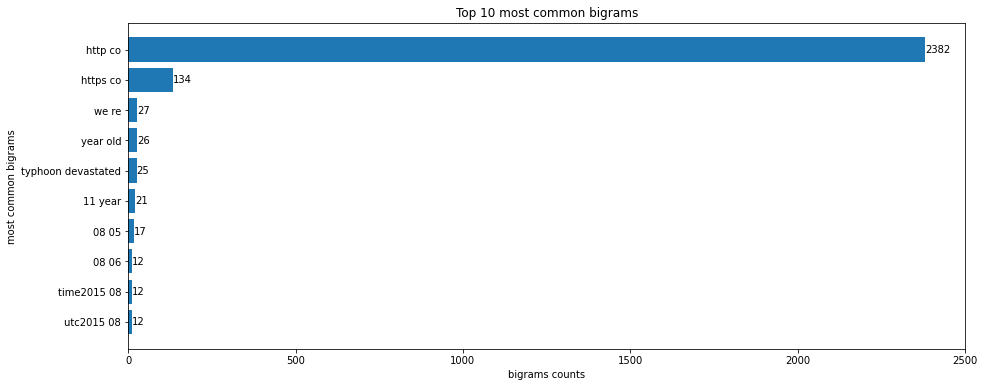

In [777]:
plt.barh(x,y)
ax=plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.xlabel('bigrams counts')
plt.ylabel('most common bigrams')
plt.title('Top 10 most common bigrams')